In [1]:
import numpy as np
import matplotlib.pylab as plt
from PIL import Image
%matplotlib inline
#Jupyter에게 matplotlib 그래프를 출력 영역에 표시할 것을 지시하는 명령

import cv2

### 01. 흑백 영상 이해

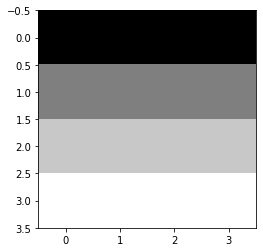

In [15]:
a = np.asarray( [
    [0,0,0,0],       #검정색
    [127,127,127,127],
    [200,200,200,200],
    [255,255,255,255]
], dtype='uint8')

plt.imshow(a, cmap='gray')   #colormap 출력할 때 gray로

In [16]:
#기본 파이썬 리스트는 불가능
aa = [1,2,3,4]
bb=aa+3

TypeError: can only concatenate list (not "int") to list

In [17]:
aa = np.array([1,2,3,4])
bb = aa+3
bb

array([4, 5, 6, 7])

[[  5   5   5   5]
 [132 132 132 132]
 [205 205 205 205]
 [  4   4   4   4]]


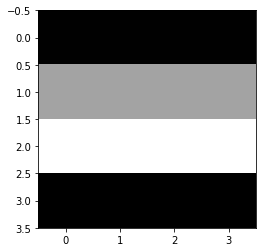

In [24]:
b = a+5
plt.imshow(b, cmap='gray')
print(b)

overflow가 일어난 것  
255+5=260(=4)

### 02. 컬러 영상 이해

(4, 4, 3)


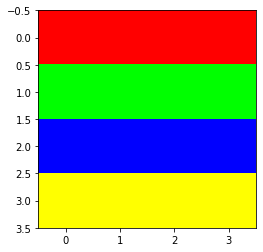

In [26]:
r = np.array( [
    [255,255,255,255],
    [0,0,0,0],
    [0,0,0,0],
    [255,255,255,255]
], dtype='uint8')

g = np.array( [
    [0,0,0,0],
    [255,255,255,255],
    [0,0,0,0],
    [255,255,255,255]
], dtype='uint8')

b = np.array( [
    [0,0,0,0],
    [0,0,0,0],
    [255,255,255,255],
    [0,0,0,0]
], dtype='uint8')

colors = np.dstack([r,g,b])   #depth stack:z축으로 쌓는다는 -> color image. 4x4x3(은 고정)
print(colors.shape)
plt.imshow(colors)

numpy dstack, hstack, vstack 있음  
셀로판지처럼  
r,g,b 각각은 gray image 이다

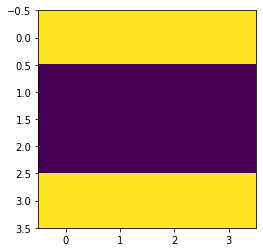

In [29]:
plt.imshow(r)

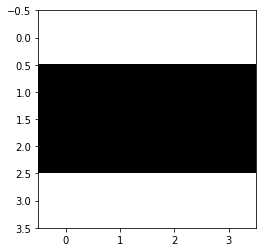

In [30]:
plt.imshow(r, cmap="gray")  #color map 정보를 지정

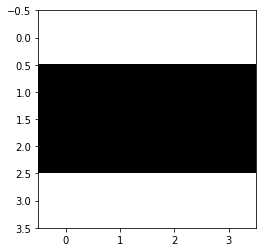

In [32]:
# overwrite 됨
plt.imshow(colors)
plt.imshow(r,cmap="gray")

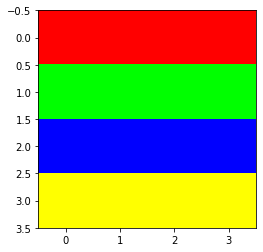

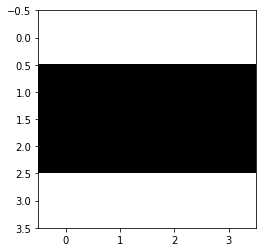

In [33]:
# 중간에 show 넣으면
plt.imshow(colors)
plt.show()
plt.imshow(r,cmap="gray")
plt.show()

#### quiz
r,g,b 정도가 나오게
채널별로 어떻게 분류?

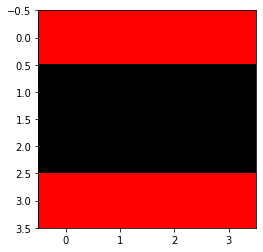

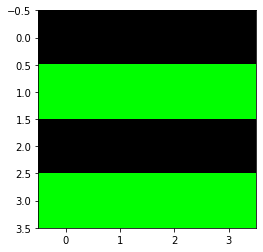

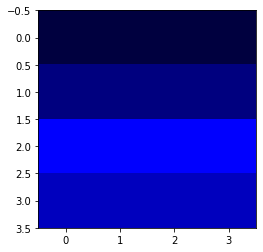

In [53]:
plt.imshow(np.dstack([r,g*0,b*0]))
plt.show()
plt.imshow(np.dstack([r*0,g,b*0]))
plt.show()
plt.imshow(np.dstack([r*0,g*0,(r//4+g//2+b)]))
plt.show()

접근 방법에 따라 알고리즘 2갈래 있다

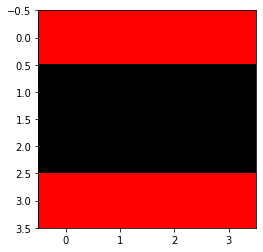

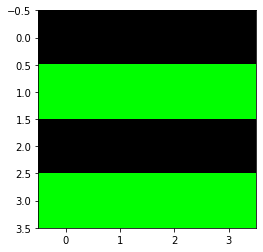

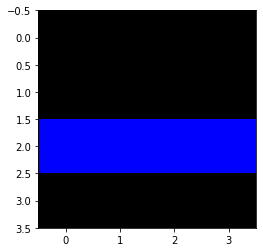

In [54]:
# 1. 셀로판지 쌓기
z = np.zeros((4,4), dtype='uint8')

rr = np.dstack([r,z,z])
gg = np.dstack([z,g,z])
bb = np.dstack([z,z,b])

plt.imshow(rr)
plt.show()
plt.imshow(gg)
plt.show()
plt.imshow(bb)
plt.show()

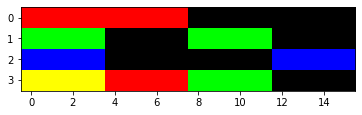

In [58]:
# 2. 옆으로 쌓기
all = np.hstack([  np.dstack([r,g,b]),    rr,gg,bb])
plt.imshow(all)

## openCV
* openCV : 영상 쉽게 읽을 수 있음
* oepncv는 기본적으로 numpy 리턴
* 채널 순서가 BGR

### 채널 순서 변경

(700, 467, 3)
<class 'numpy.ndarray'>


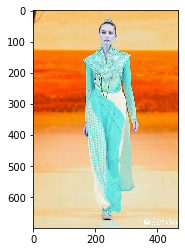

In [65]:
img = cv2.imread("foreign.jpg")   #numpy
print(img.shape)
print(type(img))

plt.imshow(img)

In [63]:
print(cv2.imread("aa.jpg")) #파일이 없으면

None


#### 채널 순서 변경 - 수동

(700, 467)


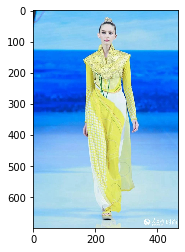

In [67]:
b = img[:,:,0]  #z축 중 첫번째 층 가져오기  (x,y축은 그대로)
print(b.shape)
g = img[:,:,1]
r = img[:,:,2]

rgb = np.dstack([r,g,b])
plt.imshow(rgb)

In [ ]:
# slicing.. 이 방법은 원본을 바꾸는 것
img[:,:,0] = r
img[:,:,1] = g
img[:,:,2] = b

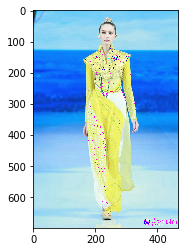

In [72]:
# 노란색을 밝게
plt.imshow(np.dstack([r+10,g+10,b]))

#### 채널 순서 변경 - 자동

True

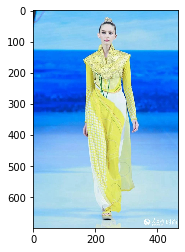

In [76]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  #convert color
plt.imshow(rgb)
cv2.imwrite("result.jpg", rgb)  #데이터를 bgr로 읽어들임

<img src=result.jpg width=50>

### 피부색 마스크 분리하기
피부색은 특정 영역에 분포되어 있음 (흑인은 예외지만)
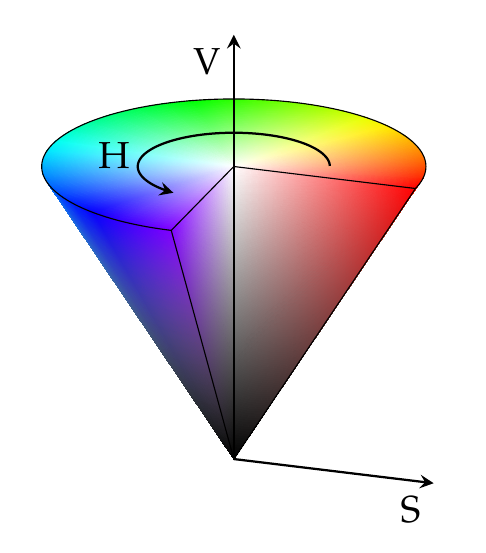

* 메모리 공간
a공간 4byte, b공간 4byte인데  
파이썬에서는 값이 같으면 4byte만 차지. 복사를 하지 않아

In [82]:
a = 8
b = 8
print(id(a))
print(id(b))
#주소 값이 같아

140715015180912
140715015180912


#### 흑백 이미지로
r,g,b 다 더하고 /3  
급하면 g만 갖고 와도 돼  
(참고) numpy는 행렬 베이스라서 row, col 순서

In [99]:
img = cv2.imread("face.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]  #흑백영상. intensive

#result = img         # 복사 아님. result도 img를 가리키는 것
result = img.copy()  # 복사본을 만듦
print(result.shape)
print(result.shape[0])

(790, 500, 3)
790


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in ubyte_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


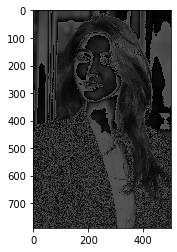

In [102]:
for r in range(h.shape[0]):
    for c in range(h.shape[1]) :
        col = ( int(img[r,c,0]) + img[r,c,1] + img[r,c,2] ) / 3
        result[r,c,0] = col
        result[r,c,1] = col;
        result[r,c,2] = col;

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))


#이상해

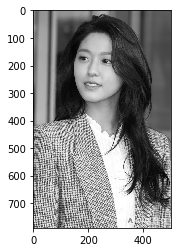

In [103]:
for r in range(h.shape[0]):
    for c in range(h.shape[1]) :
        col = ( int(img[r,c,0]) + img[r,c,1] + img[r,c,2] ) / 3
        result[r,c,0] = col
        result[r,c,1] = col;
        result[r,c,2] = col;

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

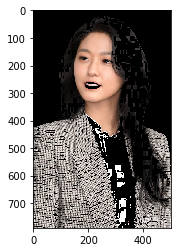

In [107]:
# 이미 학습된 결과에서 boundary만 가져와 판단.
#lower = np.array([0,48,80], dtype="uint8")
#upper = np.array([20,255,255], dtype="uint8")

for r in range(h.shape[0]):
    for c in range(h.shape[1]) :
        if h[r,c] >= 0 and h[r,c] <= 20 :
            result[r,c,0] = img[r,c,0]
            result[r,c,1] = img[r,c,1];
            result[r,c,2] = img[r,c,2];
        else :
            result[r,c,0] = 0
            result[r,c,1] = 0;
            result[r,c,2] = 0;

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

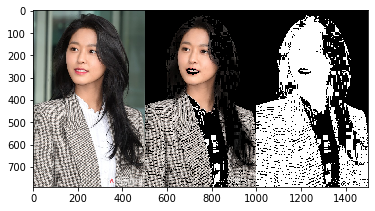

In [112]:
skinmask = img.copy()

for r in range(h.shape[0]):
    for c in range(h.shape[1]) :
        if h[r,c] >= 0 and h[r,c] <= 20 :
            skinmask[r,c,0] = 255
            skinmask[r,c,1] = 255;
            skinmask[r,c,2] = 255;
        else :
            skinmask[r,c,0] = 0
            skinmask[r,c,1] = 0;
            skinmask[r,c,2] = 0;

#plt.imshow(np.hstack([img,result,skinmask]))
plt.imshow(np.hstack([cv2.cvtColor(img, cv2.COLOR_BGR2RGB),cv2.cvtColor(result, cv2.COLOR_BGR2RGB),cv2.cvtColor(skinmask, cv2.COLOR_BGR2RGB)]))

마스크는 3차원일 필요가 없지만, hstack으로 합치려면 앞의 이미지와 같은 rank여야.

In [113]:
# 틀림

img_f = img.copy()

for r in range(h.shape[0]):
    for c in range(h.shape[1]) :
        for r in range(s.shape[0]) :
            for c in range(s.shape[1]) :
                for r in range(v.shape[0]) :
                    for c in range(v.shape[1]) :
                        if h[r,c] >= 0 and h[r,c] <= 20 and s[r,c]>=48 and v[r,c]>=80:
                            img_f[r,c,0] = img[r,c,0]
                            img_f[r,c,1] = img[r,c,1];
                            img_f[r,c,2] = img[r,c,2];
                        else :
                            img_f[r,c,0] = 0
                            img_f[r,c,1] = 0;
                            img_f[r,c,2] = 0;

plt.imshow(cv2.cvtColor(img_f, cv2.COLOR_BGR2RGB))


# 3차원->2차원 : for문

KeyboardInterrupt: 

##### 정답

In [ ]:
# if문 and로 연결

img_f = img.copy()

for r in range(h.shape[0]):
    for c in range(h.shape[1]) :
        if h[r,c] >= 0 and h[r,c] <= 20 and s[r,c]>=48 and v[r,c]>=80:
            img_f[r,c,0] = img[r,c,0]
            img_f[r,c,1] = img[r,c,1];
            img_f[r,c,2] = img[r,c,2];
        else :
            img_f[r,c,0] = 0
            img_f[r,c,1] = 0;
            img_f[r,c,2] = 0;

plt.imshow(cv2.cvtColor(img_f, cv2.COLOR_BGR2RGB))

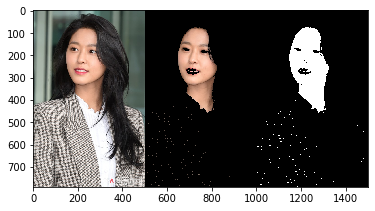

In [115]:
# if문 연결2

img_f = img.copy()

for r in range(h.shape[0]):
    for c in range(h.shape[1]) :
        
        bH = h[r,c] >= 0 and h[r,c] <= 20
        bS = s[r,c] >= 48 and s[r,c] <= 255
        bV = v[r,c] >= 80 and v[r,c] <= 255
        
        if bH and bS and bV:
            img_f[r,c,0] = img[r,c,0]
            img_f[r,c,1] = img[r,c,1];
            img_f[r,c,2] = img[r,c,2];
        else :
            img_f[r,c,0] = 0
            img_f[r,c,1] = 0;
            img_f[r,c,2] = 0;


img_mask = img.copy()
for r in range(h.shape[0]):
    for c in range(h.shape[1]) :
        
        bH = h[r,c] >= 0 and h[r,c] <= 20
        bS = s[r,c] >= 48 and s[r,c] <= 255
        bV = v[r,c] >= 80 and v[r,c] <= 255
        
        if bH and bS and bV:
            img_mask[r,c,0] = 255
            img_mask[r,c,1] = 255;
            img_mask[r,c,2] = 255;
        else :
            img_mask[r,c,0] = 0
            img_mask[r,c,1] = 0;
            img_mask[r,c,2] = 0;

plt.imshow(cv2.cvtColor(img_f, cv2.COLOR_BGR2RGB))
plt.imshow(np.hstack([cv2.cvtColor(img, cv2.COLOR_BGR2RGB),cv2.cvtColor(img_f, cv2.COLOR_BGR2RGB),cv2.cvtColor(img_mask, cv2.COLOR_BGR2RGB)]))

In [117]:
img = cv2.imread("face.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]  #흑백영상. intensive

#result = img         # 복사 아님. result도 img를 가리키는 것
result = img.copy()  # 복사본을 만듦
mask = img.copy()

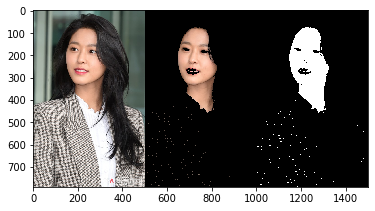

In [120]:
for r in range(h.shape[0]):
    for c in range(h.shape[1]) :
        
        bH = h[r,c] >= 0 and h[r,c] <= 20
        bS = s[r,c] >= 48 and s[r,c] <= 255
        bV = v[r,c] >= 80 and v[r,c] <= 255
        
        if bH and bS and bV:
            img_f[r,c,:] = img[r,c,:]
            mask[r,c,:] = 255
            
        else :
            img_f[r,c,:] = 0
            mask[r,c,:] = 0

all = np.hstack([img ,img_f, mask])
plt.imshow(cv2.cvtColor(all, cv2.COLOR_BGR2RGB))

### 배경 지우기

* ravel: 2차원 행렬을 1차원으로(벡터로) 바꿔줌, bin, [min, max]

In [129]:
a = np.array([[12,3],[7,8]])
print(a)
print(a.ravel())

[[12  3]
 [ 7  8]]
[12  3  7  8]


(15, 18, 3)


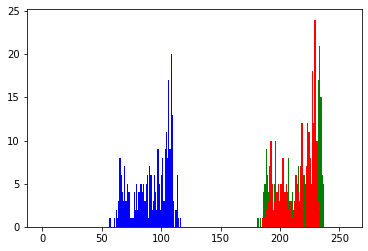

In [128]:
train = cv2.imread("patch.png")
print(train.shape)  #잘 읽었는지 checking
b,g,r = cv2.split(train)

plt.hist(b.ravel(), 256, [0,256], color='b');  # blue색은 거의 없다?
plt.hist(g.ravel(), 256, [0,256], color='g');
plt.hist(r.ravel(), 256, [0,256], color='r');

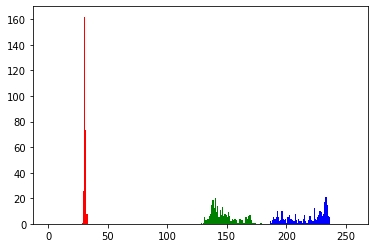

In [131]:
h,s,v = cv2.split(   cv2.cvtColor(train, cv2.COLOR_BGR2HSV)   )
plt.hist(h.ravel(), 256, [0,256], color='r');
plt.hist(s.ravel(), 256, [0,256], color='g');
plt.hist(v.ravel(), 256, [0,256], color='b');

=> 색상(hue)만 봐도 된다는 의미.

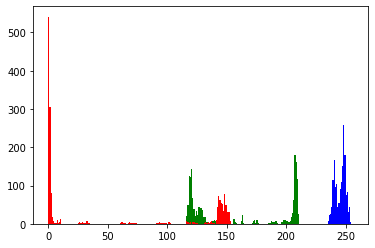

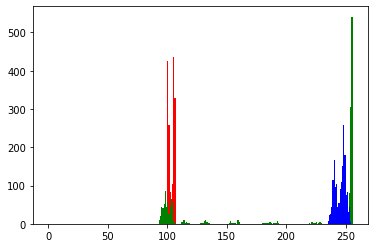

In [135]:
train2 = cv2.imread("patch2.png")

b,g,r = cv2.split(train2)
plt.hist(b.ravel(), 256, [0,256], color='b');  # blue색은 거의 없다?
plt.hist(g.ravel(), 256, [0,256], color='g');
plt.hist(r.ravel(), 256, [0,256], color='r');
plt.show()
h,s,v = cv2.split(   cv2.cvtColor(train2, cv2.COLOR_BGR2HSV)   )
plt.hist(h.ravel(), 256, [0,256], color='r');
plt.hist(s.ravel(), 256, [0,256], color='g');
plt.hist(v.ravel(), 256, [0,256], color='b');
plt.show()

#### Chromakey

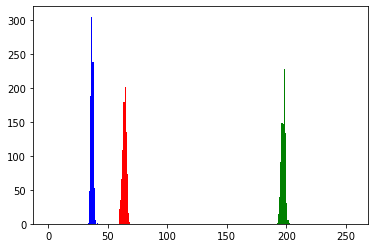

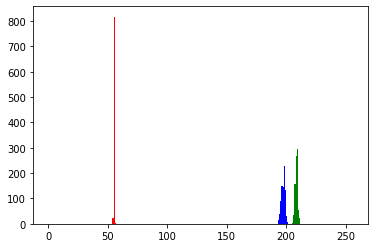

In [30]:
chromakey_patch = cv2.imread("chromakey_patch.png")

b,g,r = cv2.split(chromakey_patch)
plt.hist(b.ravel(), 256, [0,256], color='b');  # blue색은 거의 없다?
plt.hist(g.ravel(), 256, [0,256], color='g');
plt.hist(r.ravel(), 256, [0,256], color='r');
plt.show()
h,s,v = cv2.split(   cv2.cvtColor(chromakey_patch, cv2.COLOR_BGR2HSV)   )
plt.hist(h.ravel(), 256, [0,256], color='r');
plt.hist(s.ravel(), 256, [0,256], color='g');
plt.hist(v.ravel(), 256, [0,256], color='b');
plt.show()

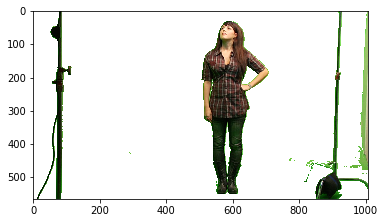

In [31]:
chromakey = cv2.imread("chromakey.png")
hsv = cv2.cvtColor(chromakey, cv2.COLOR_BGR2HSV)
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]  #흑백영상. intensive

#result = img         # 복사 아님. result도 img를 가리키는 것
result = chromakey.copy()  # 복사본을 만듦

for r in range(h.shape[0]):
    for c in range(h.shape[1]) :
        bH = h[r,c] >= 50 and h[r,c] <= 65
        bS = s[r,c] >= 170 and s[r,c] <= 230
        bV = v[r,c] >= 150 and v[r,c] <= 230
        bV2 = v[r,c] <= 10
        
        if bH and bS and bV:
            result[r,c,:] = 255
        else :
            result[r,c,:] = chromakey[r,c,:]

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

#### 자동화 시스템

55


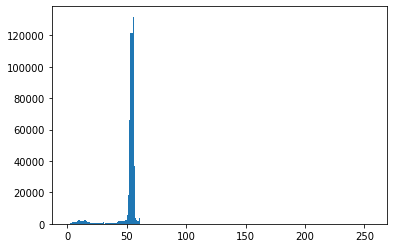

In [32]:
hi = plt.hist(h.ravel(), 256,[0,256]);
#print(hi)
value = (np.where( hi[0] == np.max(  hi[0])  ))[0][0];
print(value)

In [158]:
print(hi[0])  #frequency

[1.20000e+02 1.50000e+02 3.29000e+02 6.16000e+02 8.43000e+02 1.08800e+03
 1.32200e+03 1.44800e+03 2.06900e+03 2.31700e+03 2.24100e+03 1.92100e+03
 1.62500e+03 1.91100e+03 2.47000e+03 2.30900e+03 1.67400e+03 1.00900e+03
 9.73000e+02 7.41000e+02 7.48000e+02 7.45000e+02 4.94000e+02 7.14000e+02
 5.82000e+02 7.27000e+02 7.61000e+02 5.51000e+02 4.37000e+02 2.52000e+02
 9.35000e+02 1.84000e+02 4.51000e+02 5.64000e+02 5.35000e+02 6.87000e+02
 5.45000e+02 4.63000e+02 7.55000e+02 6.47000e+02 7.09000e+02 8.24000e+02
 1.11400e+03 1.59000e+03 1.59800e+03 1.92900e+03 2.01300e+03 1.94300e+03
 1.96800e+03 2.58400e+03 5.64300e+03 1.81550e+04 6.60800e+04 1.21618e+05
 1.21149e+05 1.31820e+05 3.65260e+04 3.77300e+03 2.11000e+03 1.50200e+03
 3.78800e+03 8.90000e+01 1.80000e+02 1.89000e+02 1.35000e+02 1.12000e+02
 8.50000e+01 2.70000e+01 6.80000e+01 4.30000e+01 4.70000e+01 2.20000e+01
 1.50000e+01 1.40000e+01 1.10000e+01 3.30000e+01 7.00000e+00 4.00000e+00
 7.00000e+00 3.00000e+00 1.00000e+01 5.00000e+00 1.

In [159]:
print(hi[1])  #bin value

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

36 198 64


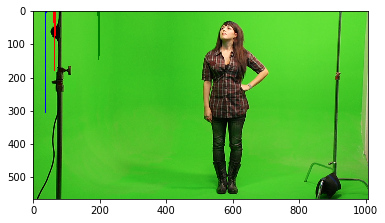

In [33]:
train = cv2.imread("chromakey_patch.png")
b,g,r = cv2.split(chromakey_patch)
hb = plt.hist(b.ravel(), 256, [0,256], color='b');
hg = plt.hist(g.ravel(), 256, [0,256], color='g');
hr = plt.hist(r.ravel(), 256, [0,256], color='r');

# 학습
maxb = (np.where( hb[0] == np.max(hb[0]) ))[0][0]
maxg = (np.where( hg[0] == np.max(hg[0]) ))[0][0]
maxr = (np.where( hr[0] == np.max(hr[0]) ))[0][0]

print(maxb, maxg, maxr)


#테스트 적용
test = cv2.imread("chromakey.png")

for r in range(test.shape[0]):
    for c in range(test.shape[1]) :
        if np.array_equal (test[r,c,:], [maxg, maxb, maxr]) :
            test[r,c,:] = 0

plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

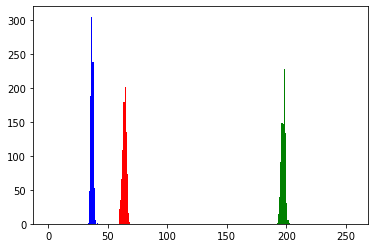

In [34]:
train = cv2.imread("chromakey_patch.png")
b,g,r = cv2.split(chromakey_patch)
hb = plt.hist(b.ravel(), 256, [0,256], color='b');
hg = plt.hist(g.ravel(), 256, [0,256], color='g');
hr = plt.hist(r.ravel(), 256, [0,256], color='r');

# 학습
maxb = (np.where( hb[0] == np.max(hb[0]) ))[0][0]
maxg = (np.where( hg[0] == np.max(hg[0]) ))[0][0]
maxr = (np.where( hr[0] == np.max(hr[0]) ))[0][0]

#테스트 적용
test = cv2.imread("chromakey.png")
arr = 10
min_arr = [maxg-arr, maxb-arr, maxr-arr]
max_arr = [maxg+arr, maxb+arr, maxr+arr]

for r in range(test.shape[0]):
    for c in range(test.shape[1]) :
        if np.clip (test[r,c,:], min_arr, max_arr) :
            test[r,c,:] = [0,0,0]

plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB))

In [40]:
#pf
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2 

(20, 42, 3)
36
198
64
36.088095238095235
197.12261904761905
63.404761904761905
0.38353588856612447


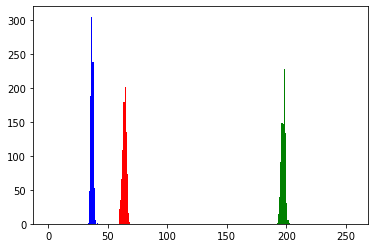

In [10]:
train = cv2.imread("chromakey_patch.png")    
print(train.shape)
b,g,r = cv2.split(train)
hb = plt.hist(b.ravel(), 256, [0,256], color='b') 
hg = plt.hist(g.ravel(), 256, [0,256], color='g') 
hr = plt.hist(r.ravel(), 256, [0,256], color='r') 
maxb = (np.where( hb[0] == np.max(hb[0])) )[0][0]
maxg = (np.where( hg[0] == np.max(hg[0])) )[0][0]
maxr = (np.where( hr[0] == np.max(hr[0])) )[0][0]
print(maxb)
print(maxg)
print(maxr)

print(np.mean(b) )
print(np.mean(g) )
print(np.mean(r) )

t = 196
p= sp.norm(0,1).pdf(  (np.mean(g) - t)/4  )
print(p)

In [21]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np


In [25]:
np.std(b)

1.0370981449979924

In [26]:
np.std(g)

1.6440260679253662

In [27]:
np.std(r)

0.0

In [43]:
from scipy.stats import describe
import scipy.stats as sp
describe(g)

DescribeResult(nobs=20, minmax=(array([198, 198, 197, 198, 197, 197, 197, 197, 197, 197, 197, 196, 196,
       196, 197, 197, 196, 195, 197, 196, 197, 197, 196, 195, 196, 196,
       196, 195, 195, 195, 195, 193, 193, 194, 194, 195, 194, 194, 193,
       194, 192, 193], dtype=uint8), array([202, 200, 201, 201, 201, 200, 200, 200, 200, 200, 200, 200, 199,
       200, 199, 199, 200, 201, 200, 199, 199, 199, 198, 199, 198, 198,
       199, 198, 199, 197, 196, 197, 198, 196, 196, 197, 199, 197, 196,
       196, 196, 196], dtype=uint8)), mean=array([199.6 , 199.1 , 198.85, 198.95, 198.6 , 198.4 , 198.3 , 198.4 ,
       198.35, 198.2 , 198.15, 197.75, 197.8 , 198.  , 198.15, 198.05,
       198.1 , 198.05, 198.15, 197.95, 197.9 , 197.55, 197.25, 197.1 ,
       197.05, 196.7 , 196.7 , 196.55, 196.2 , 195.8 , 195.5 , 195.4 ,
       195.75, 195.65, 195.55, 195.95, 196.5 , 195.3 , 194.95, 194.65,
       194.1 , 194.15]), variance=array([0.98947368, 0.41052632, 0.66052632, 0.57631579, 0.67368421,


In [14]:
prob = sp.norm(maxg, 6).pdf(195) 
print(prob)

0.05867755446071659


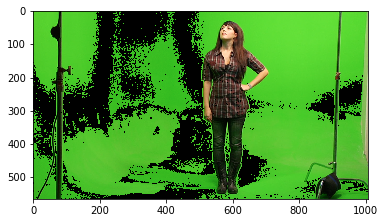

In [44]:


test = cv2.imread("chromakey.png")
norm = sp.norm(0, 1)
for r in range(test.shape[0]) :
    for c in range(test.shape[1]) :  
        prob = 0
        prob += norm.pdf((test[r,c,0]-maxb)/2)
        prob += norm.pdf((test[r,c,1]-maxg)/3)
        prob += norm.pdf((test[r,c,2]-maxr)/1)        
        if prob > 0.4 :   
            test[r, c, : ] = [0,0,0]               

plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB) ) 

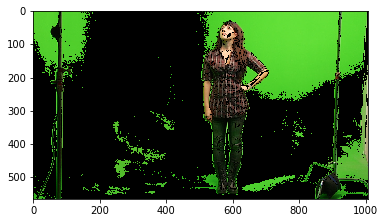

In [46]:
test = cv2.imread("chromakey.png")
norm = sp.norm(0, 1)
for r in range(test.shape[0]) :
    for c in range(test.shape[1]) :  
        prob = 0
        prob += norm.pdf((test[r,c,0]-maxb)/2)
        prob += norm.pdf((test[r,c,1]-maxg)/3)
        prob += norm.pdf((test[r,c,2]-maxr)/1)        
        if prob > 0.05 :   
            test[r, c, : ] = [0,0,0]               

plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB) ) 

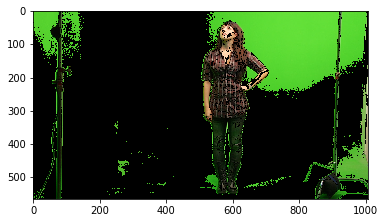

In [47]:
test = cv2.imread("chromakey.png")
norm = sp.norm(0, 1)
for r in range(test.shape[0]) :
    for c in range(test.shape[1]) :  
        prob = 0
        prob += norm.pdf((test[r,c,0]-maxb)/2)
        prob += norm.pdf((test[r,c,1]-maxg)/3)
        prob += norm.pdf((test[r,c,2]-maxr)/1)        
        if prob > 0.01 :   
            test[r, c, : ] = [0,0,0]               

plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB) ) 

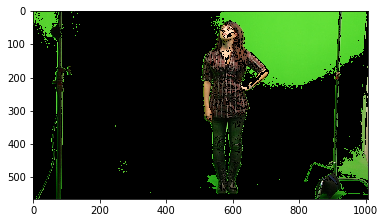

In [48]:
test = cv2.imread("chromakey.png")
norm = sp.norm(0, 1)
for r in range(test.shape[0]) :
    for c in range(test.shape[1]) :  
        prob = 0
        prob += norm.pdf((test[r,c,0]-maxb)/2)
        prob += norm.pdf((test[r,c,1]-maxg)/3)
        prob += norm.pdf((test[r,c,2]-maxr)/1)        
        if prob > 0.001 :   
            test[r, c, : ] = [0,0,0]               

plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB) ) 

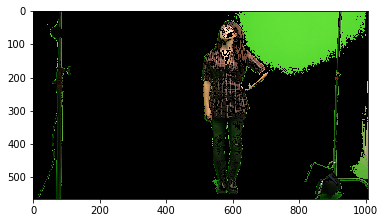

In [49]:
test = cv2.imread("chromakey.png")
norm = sp.norm(0, 1)
for r in range(test.shape[0]) :
    for c in range(test.shape[1]) :  
        prob = 0
        prob += norm.pdf((test[r,c,0]-maxb)/4)
        prob += norm.pdf((test[r,c,1]-maxg)/6)
        prob += norm.pdf((test[r,c,2]-maxr)/2)        
        if prob > 0.01 :   
            test[r, c, : ] = [0,0,0]               

plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB) ) 

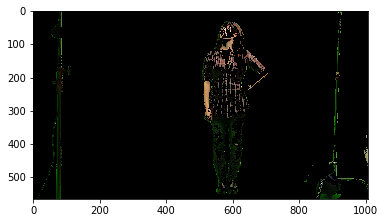

In [50]:
test = cv2.imread("chromakey.png")
norm = sp.norm(0, 1)
for r in range(test.shape[0]) :
    for c in range(test.shape[1]) :  
        prob = 0
        prob += norm.pdf((test[r,c,0]-maxb)/8)
        prob += norm.pdf((test[r,c,1]-maxg)/12)
        prob += norm.pdf((test[r,c,2]-maxr)/4)        
        if prob > 0.01 :   
            test[r, c, : ] = [0,0,0]               

plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB) ) 

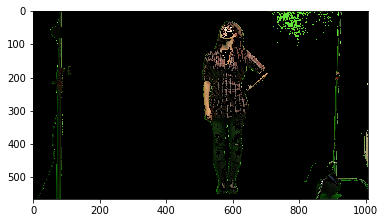

In [51]:
test = cv2.imread("chromakey.png")
norm = sp.norm(0, 1)
for r in range(test.shape[0]) :
    for c in range(test.shape[1]) :  
        prob = 0
        prob += norm.pdf((test[r,c,0]-maxb)/8)
        prob += norm.pdf((test[r,c,1]-maxg)/12)
        prob += norm.pdf((test[r,c,2]-maxr)/4)        
        if prob > 0.05 :   
            test[r, c, : ] = [0,0,0]               

plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB) ) 